## Data analysis
* get sence of variables and distributions

https://www.kaggle.com/code/fedi1996/house-prices-data-cleaning-viz-and-modeling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data_train=pd.read_csv('../data/house-prices-advanced-regression-techniques/train.csv')
data_train['train']=1

data_test=pd.read_csv('../data/house-prices-advanced-regression-techniques/test.csv')
data_test['train']=0

data_all=pd.concat([data_train,data_test])
data_all=data_all.set_index('Id')

In [3]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [22]:
import math

In [26]:
(1/2)**5*(1-1/2)**7*math.factorial(12)/math.factorial(5)/math.factorial(7)

0.193359375

### Missing values

<AxesSubplot:>

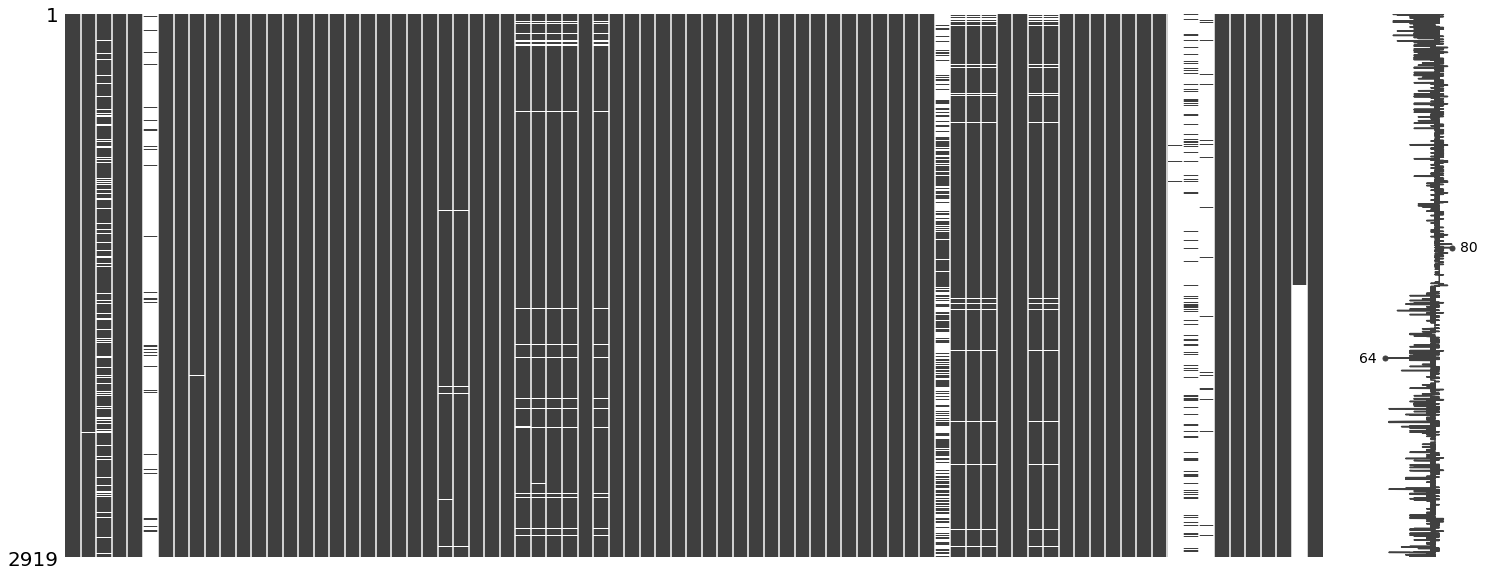

In [4]:
import missingno as msno

msno.matrix(data_all.sort_values(by='SalePrice'))

### Drop columns where missing values> 70%

['PoolQC' 'MiscFeature' 'Alley' 'Fence']


<AxesSubplot:>

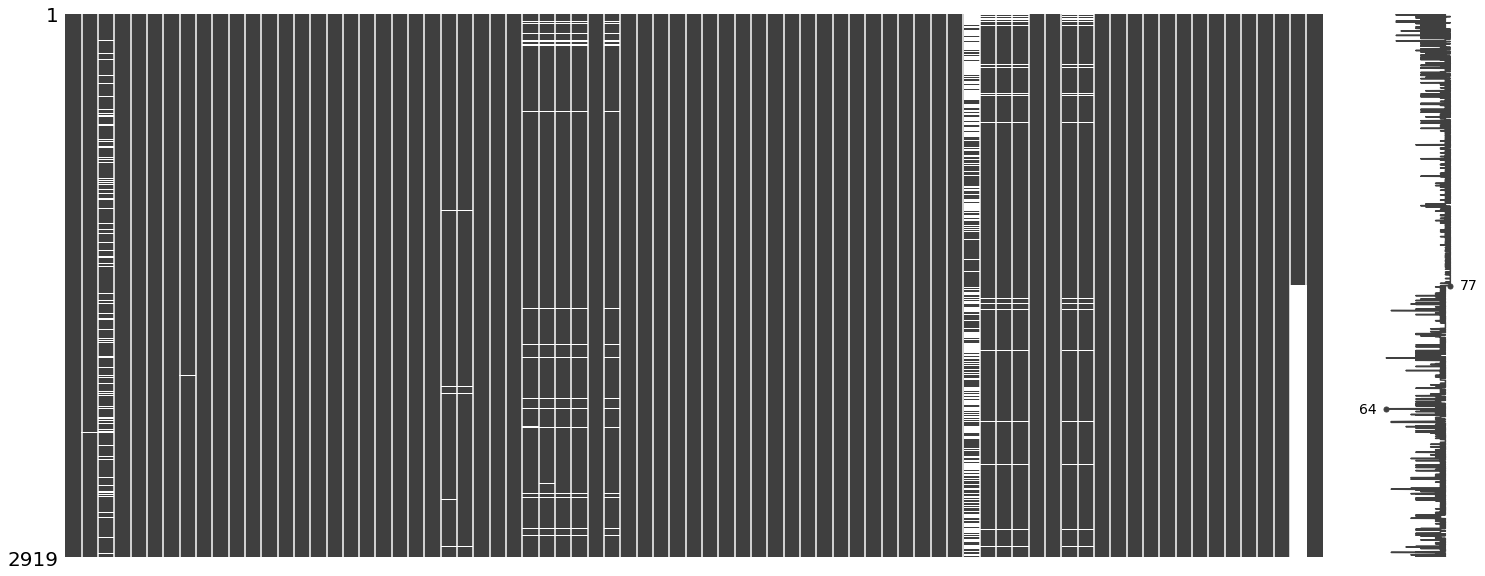

In [7]:
percent_Nan = [(c, data_all[c].isna().mean()) for c in data_all]
Nan_percent = pd.DataFrame(percent_Nan, columns=["column_name", "percentage"])
Nan_percent=Nan_percent.sort_values(by='percentage',ascending=False)

list_drop_columns=Nan_percent[Nan_percent['percentage']>0.70]['column_name'].values
print(list_drop_columns)

data_all_c1=data_all.drop(list_drop_columns,axis=1)

msno.matrix(data_all_c1.sort_values(by='SalePrice'))

## Work with numerical and categorical data separetely

In [14]:
object_columns = data_all_c1.select_dtypes(include=['object'])
numerical_columns =data_all_c1.select_dtypes(include=[np.number])

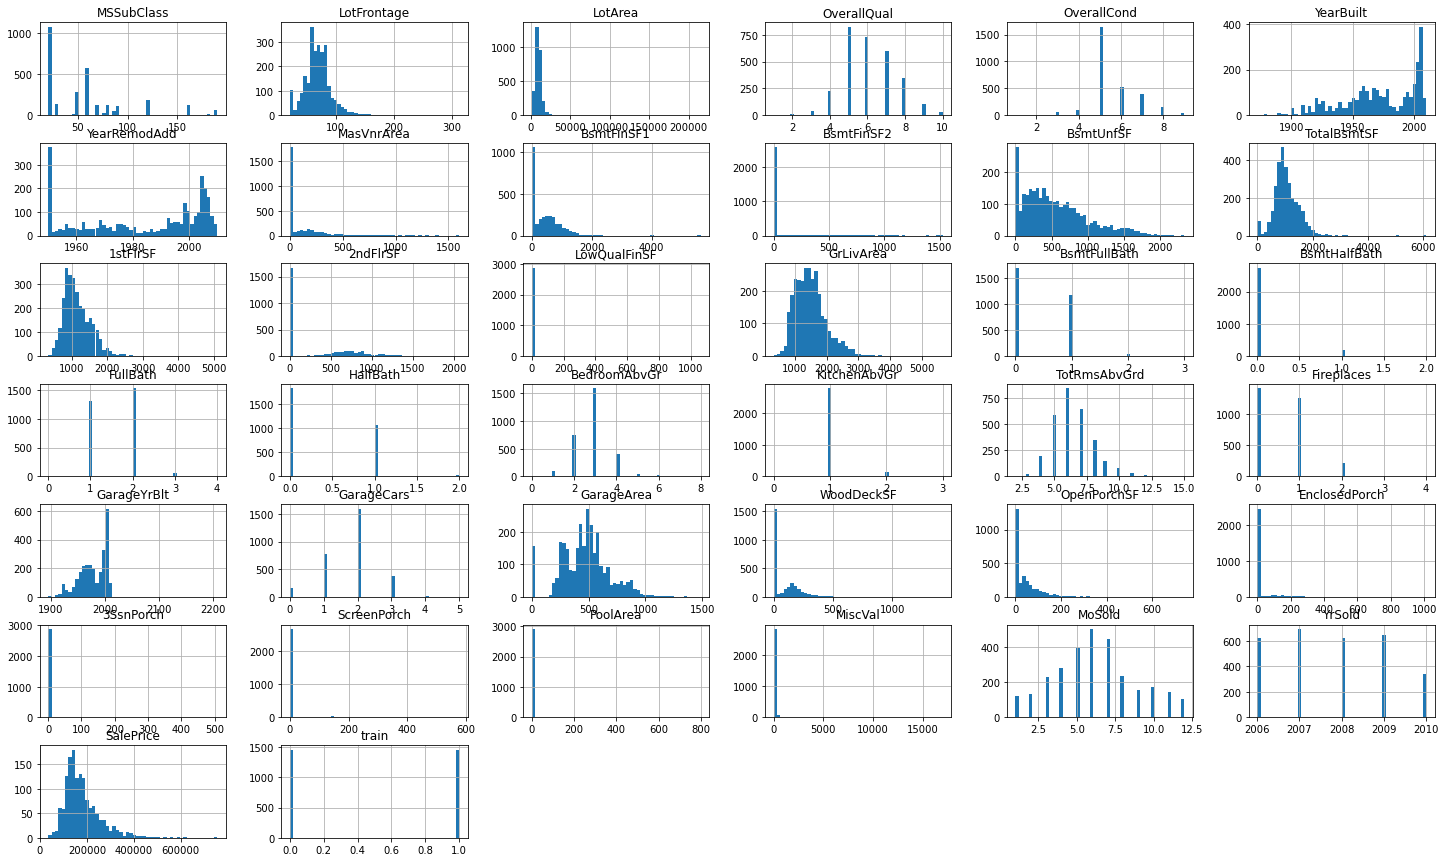

In [15]:
numerical_columns.hist(bins=50,figsize=(25,15));

## columns that are categorical

<AxesSubplot:>

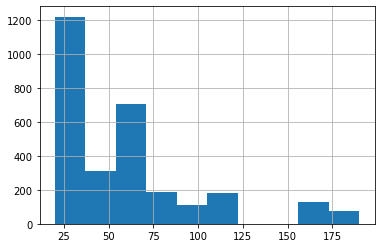

In [17]:
numerical_columns['MSSubClass'].hist()

In [9]:
data_all.select_dtypes(include=np.number).columns.tolist()

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'train']

Substantional amount of missing values in attributes
'Alley','FireplaceQu','PoolQC', 'Fence','MiscFeature'


data['Street']


## Data preprocessing
dealing with missing values

,column_name,percentage


KeyError: "['PoolQC' 'MiscFeature' 'Alley' 'Fence'] not found in axis"

In [8]:
msno.matrix(data_all.sort_values(by='SalePrice'))

NameError: name 'msno' is not defined